### 使用PCA降噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

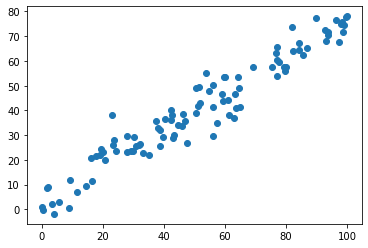

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

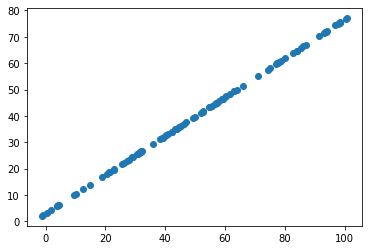

In [7]:
plt.scatter(X_restore[:, 0], X_restore[:, 1]) # 低维数据在高维显示,降维的过程也去除了部分噪音
plt.show()

### 手写识别的例子

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)  # 对原数据加上一部分噪音

In [11]:
example_digits = noisy_digits[y==0,:][:10] # 取10个数字0
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10] # 从有噪音的数据对每个数字1~9各取10个
    example_digits = np.vstack([example_digits, X_num])

In [12]:
example_digits.shape

(100, 64)

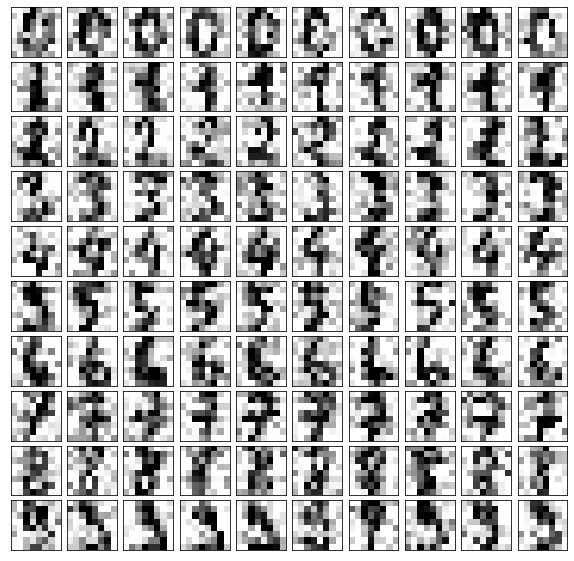

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [14]:
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

12

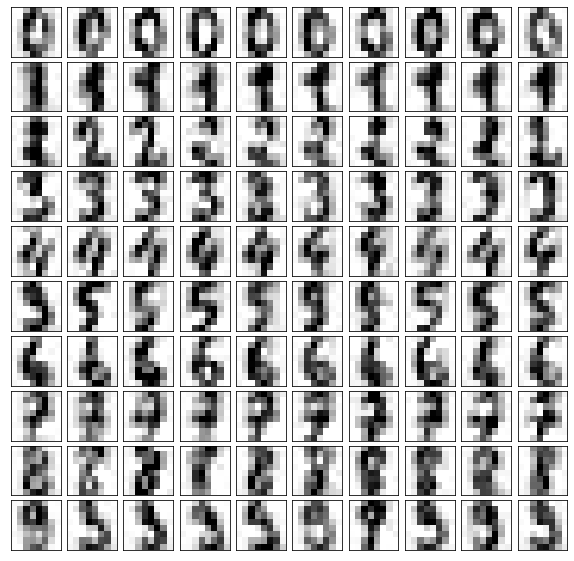

In [15]:
components = pca.transform(example_digits) # 进行降维
filtered_digits = pca.inverse_transform(components) # 对低维数据在高维进行显示
plot_digits(filtered_digits)

# 可以发现，图片是变得更易于辨认